In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def stats(arr):
    print("Mean: " , np.mean(arr))
    print("Median: ", np.median(arr))
    print("Std Dev:" , np.std(arr))
    print("Max: " , max(arr))
    print("Min: " , min(arr))

In [3]:
%%time
sf_data = pd.read_csv("/scratch/public/kushk/sf_with_homeloc.csv")
sf_data = sf_data[~sf_data["home_tract"].isna()]
sf_data = sf_data[~sf_data["tract"].isna()]

CPU times: user 3min 18s, sys: 28.1 s, total: 3min 46s
Wall time: 3min 48s


## Group tweets by UserId/Tract combo count

In [4]:
users = sf_data.groupby(["u_id" , "tract"]).size().reset_index().rename(columns={0:'count'})

In [31]:
users.head()

,u_id,tract,count
0,1.112537e-308,6.001401e+09,1
1,1.112537e-308,6.001402e+09,1
2,1.112537e-308,6.013349e+09,1
3,1.112537e-308,6.041121e+09,1
4,1.112537e-308,6.041124e+09,2


In [5]:
#read in neighbor dataset
nn_data = pd.read_csv("/scratch/public/kushk/neighbor_new.csv")
nn_data.head()

,OBJECTID,SRC_GEOID,NBR_GEOID,LENGTH,NODE_COUNT
0,1,6001400100,6001404300,11.573519,0
1,2,6001400100,6001404400,4424.829004,0
2,3,6001400100,6001421600,477.810686,0
3,4,6001400100,6001422600,1282.939498,0
4,5,6001400100,6001422700,553.272576,0


In [6]:
tracts = list(set(nn_data["SRC_GEOID"]))

In [7]:
means = []
medians = []
sds = []
percentOverFive = []

for tract in tracts:
    one_tract = users[users["tract"] == tract]
    if(len(one_tract) > 0):
        means.append(np.mean(one_tract["count"]))
        medians.append(np.median(one_tract["count"]))
        sds.append(np.std((one_tract["count"])))
        percentOverFive.append(sum(one_tract["count"] > 5) / len(one_tract["count"]))
    else:
        means.append(0)
        medians.append(0)
        sds.append(0)
        percentOverFive.append(0)

In [8]:
output = pd.DataFrame({"Tract" : list(tracts) , "Mean User Tweets" : means,  "Median User Tweets" : medians,  "Mean STD DEV" : sds, "Percent over five" : percentOverFive} , )

In [10]:
output.to_csv("User_analysis_output_new.csv")

In [9]:
users.to_csv("users_new.csv")

In [10]:
output.head()

,Mean STD DEV,Mean User Tweets,Median User Tweets,Percent over five,Tract
0,60.689933,15.363441,2.0,0.238710,6067003400
1,98.033474,6.147123,1.0,0.071661,6013354001
2,65.448926,6.808470,1.0,0.128319,6013354002
3,238.805483,35.590031,1.0,0.226857,6095251803
4,175.189010,42.491304,2.0,0.300000,6095251804


In [11]:
cols = output.columns.tolist()
cols = cols[::-1]
output = output[cols]
output.head()

,Tract,Percent over five,Median User Tweets,Mean User Tweets,Mean STD DEV
0,6067003400,0.238710,2.0,15.363441,60.689933
1,6013354001,0.071661,1.0,6.147123,98.033474
2,6013354002,0.128319,1.0,6.808470,65.448926
3,6095251803,0.226857,1.0,35.590031,238.805483
4,6095251804,0.300000,2.0,42.491304,175.189010


## Histogram of Mean user tweets by tract - Limited range [0,120]

Mean:  20.458799030770862
Median:  15.55672051107629
Std Dev: 16.28901761056476
Max:  149.75038284839204
Min:  0.0


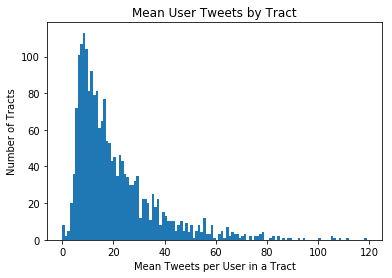

In [26]:
plt.hist(output["Mean User Tweets"] , bins = range(120))
plt.xlabel("Mean Tweets per User in a Tract")
plt.ylabel("Number of Tracts")
plt.title("Mean User Tweets by Tract")
stats(output["Mean User Tweets"])

## Histogram of Median User Tweets by Tract

Mean:  1.5758258258258258
Median:  2.0
Std Dev: 0.6794062013848369
Max:  12.0
Min:  0.0


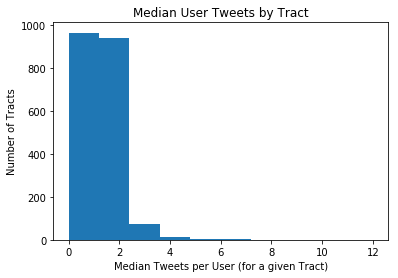

In [27]:
plt.hist(output["Median User Tweets"])
plt.xlabel("Median Tweets per User (for a given Tract)")
plt.ylabel("Number of Tracts")
plt.title("Median User Tweets by Tract")
stats(output["Median User Tweets"])

## Histogram of Tweets per User - limited from [0,60]

Mean:  15.931138107908515
Median:  2.0
Std Dev: 171.09390758843494
Max:  88707
Min:  1


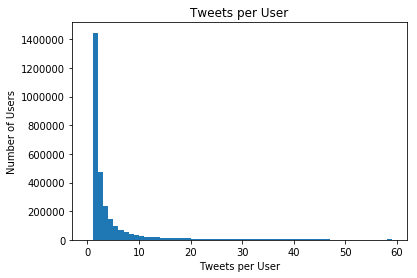

In [29]:
plt.hist(users["count"] , bins=range(60))
plt.xlabel("Tweets per User")
plt.ylabel("Number of Users")
plt.title("Tweets per User")
stats(users["count"])

## Histogram of Percent of Users above 5 tweets in a tract

Mean:  0.20522393353067145
Median:  0.19524222470456817
Std Dev: 0.0735043355859637
Max:  0.5714285714285714
Min:  0.0


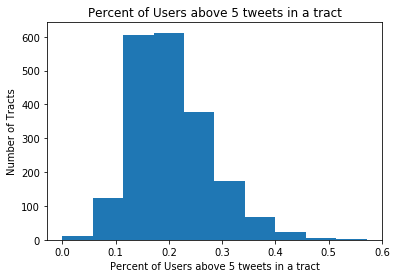

In [30]:
plt.hist(output["Percent over five"])
plt.xlabel("Percent of Users above 5 tweets in a tract")
plt.ylabel("Number of Tracts")
plt.title("Percent of Users above 5 tweets in a tract")
stats(output["Percent over five"])